<p>A number of applications for credit cards are received by commercial banks. For various factors, many of them are refused, such as high debt balances, low income levels, or too many questions into an individual's credit report, for instance. It is mundane, error-prone, and time-consuming and time is money!) to manually analyze these applications. Luckily, with the power of machine learning, this activity can be automated and almost every commercial bank does so nowadays. In this notebook, we will create an automated credit card approval predictor using machine learning techniques, just like the real banks do. </p>
<p><img style="width:500px;height:600px;" src="https://i.imgur.com/A5d4Owx.jpg" alt="Credit card being held in hand"></p>
<p>We will work in existing data from UCI. We also use in the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from UCI machine learning repository.</p>
<p>This notebook follows the some instructions</P>
<ul>
<li>At first , we load and view the dataset.</li>
<li>Here, we could see some numerical and categorical values.This valus are some missing , attributes are not relevant.In this section, we will analysis in this dataset from top to bottom.We will find what factors can impact in this dataset.</li>
<li> We will have to preprocesses the data to ensure before implementing machine learning model and so that we can get better performance from my model. </li>
<li>We will make visualize on the data cause visualize data can say a thousands of word in insights.</li>
<li>We will evaluate performance the model. </li>
<li>Then we will do hyperparameter tuning and optimization so that we can get better performance.</li>
<li> We will also do comparison some machine learning model which model will give a better result.<li>
</ul>


First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.

In [ ]:
#import numpy library
import numpy as np
# Import pandas library
import pandas as pd

# Load dataset
credit_c_approval = pd.read_csv("/content/cc_approvals.data",header=None)

credit_c_approval.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+


## Exploratory data analysis and visualizations
Here, we can see  a data set without columns names.And also seeing numerical and categorical values.We will need some analysis in this dataset.This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.


<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p

In [ ]:
columns_names = ['Gender', 'Age','Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity','YearsEmployed','priorDefault','Employed','CreditScore','DriverLicense','Citizen','Zipcode','Income', 'ApprovalStatus']
print("headers\n", columns_names)

headers
 ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'priorDefault', 'Employed', 'CreditScore', 'DriverLicense', 'Citizen', 'Zipcode', 'Income', 'ApprovalStatus']


In [ ]:
credit_c_approval.columns = columns_names
credit_c_approval.head(3)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,priorDefault,Employed,CreditScore,DriverLicense,Citizen,Zipcode,Income,ApprovalStatus
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+


In [ ]:
credit_c_approval.tail(3)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,priorDefault,Employed,CreditScore,DriverLicense,Citizen,Zipcode,Income,ApprovalStatus
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [ ]:
print(credit_c_approval.dtypes)

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
priorDefault       object
Employed           object
CreditScore         int64
DriverLicense      object
Citizen            object
Zipcode            object
Income              int64
ApprovalStatus     object
dtype: object


In [ ]:
credit_c_approval.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

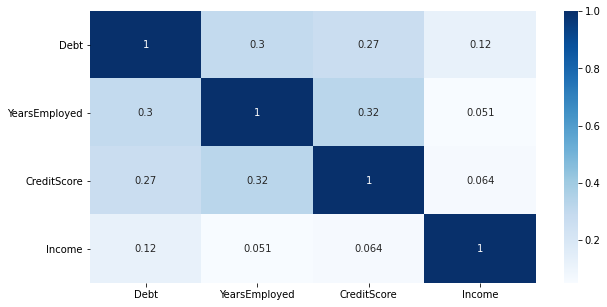

In [ ]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
g = sns.heatmap(credit_c_approval.corr(), annot = True, cmap='Blues')

In [ ]:
credit_c_approval.describe(include="all")

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,priorDefault,Employed,CreditScore,DriverLicense,Citizen,Zipcode,Income,ApprovalStatus
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [ ]:
credit_card_info = credit_c_approval.info()
print(credit_card_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   priorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriverLicense   690 non-null    object 
 12  Citizen         690 non-null    object 
 13  Zipcode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


In [ ]:
credit_c_approval.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
priorDefault      0
Employed          0
CreditScore       0
DriverLicense     0
Citizen           0
Zipcode           0
Income            0
ApprovalStatus    0
dtype: int64

In [ ]:
credit_c_approval.corr()

,Debt,YearsEmployed,CreditScore,Income
Debt,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.298902,1.000000,0.322330,0.051345
CreditScore,0.271207,0.322330,1.000000,0.063692
Income,0.123121,0.051345,0.063692,1.000000


In [ ]:
credit_c_approval.describe(include = ['object'])

,Gender,Age,Married,BankCustomer,EducationLevel,Ethnicity,priorDefault,Employed,DriverLicense,Citizen,Zipcode,ApprovalStatus
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


In [ ]:
credit_c_approval['Gender'].value_counts().to_frame()

,Gender
b,468
a,210
?,12


In [ ]:
credit_c_approval['Married'].value_counts().to_frame()

,Married
u,519
y,163
?,6
l,2


##Handling the missing values 
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [ ]:

import numpy as np

print(credit_c_approval.isnull().values.sum())

# Replace the '?'s with NaN
credit_card_ = credit_c_approval.replace('?',np.nan)
credit_card_.tail(17)



0


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,priorDefault,Employed,CreditScore,DriverLicense,Citizen,Zipcode,Income,ApprovalStatus
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [ ]:
credit_card_['Gender'].value_counts().to_frame()

,Gender
b,468
a,210


In [ ]:
credit_card_.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
priorDefault       0
Employed           0
CreditScore        0
DriverLicense      0
Citizen            0
Zipcode           13
Income             0
ApprovalStatus     0
dtype: int64


<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>We are going to impute the missing values with a strategy called mean imputation.</p>

In [ ]:
# Impute the missing values with mean imputation
credit_card_.fillna(credit_card_.mean(), inplace=True)


print(credit_card_.isnull().values.sum())

67



<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns. This is good practice when it comes to imputing missing values for categorical data in general.</p>

In [ ]:

for col in credit_card_:
    # Check if the column is of object type
    if credit_card_[col].dtypes == 'object':
        # Impute with the most frequent value
        credit_card_ = credit_card_.fillna(credit_card_[col].value_counts().index[0])

print(credit_card_.isnull().values.sum())

0


In [ ]:
credit_card_['Gender'].value_counts().to_frame()

,Gender
b,480
a,210


##Data Preprocessing

##Preprocessing the data
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning model require the data to be in a strictly numeric format. We will do this by using a technique called label encoding</a>.</p>

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in credit_card_:
    if credit_card_[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        credit_card_[col]=le.fit_transform(credit_card_[col])
credit_card_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    int64  
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   EducationLevel  690 non-null    int64  
 6   Ethnicity       690 non-null    int64  
 7   YearsEmployed   690 non-null    float64
 8   priorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriverLicense   690 non-null    int64  
 12  Citizen         690 non-null    int64  
 13  Zipcode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 86.4 KB


In [ ]:
credit_card_.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,priorDefault,Employed,CreditScore,DriverLicense,Citizen,Zipcode,Income,ApprovalStatus
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


##Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing.</p>

In [ ]:
X = credit_card_.drop(['DriverLicense', 'Zipcode','ApprovalStatus'], axis = 1)
y = credit_card_['ApprovalStatus']

NameError: ignored

In [ ]:
print(X.shape)
print(y.shape)
X.head(3)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X , y, train_size = 0.70, test_size = 0.30, random_state = 42)

In [ ]:
X_train.shape

In [ ]:
y_test.shape

##Preprocessing the data
<p>The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>


In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#  MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.fit_transform(X_test)

In [ ]:
rescaled_X_train

array([[0.00000000e+00, 7.44985673e-02, 3.51243592e-01, ...,
        5.97014925e-02, 0.00000000e+00, 5.40000000e-03],
       [1.00000000e+00, 3.43839542e-02, 3.22764382e-03, ...,
        0.00000000e+00, 0.00000000e+00, 7.22000000e-03],
       [1.00000000e+00, 1.97707736e-01, 4.36681223e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.00000000e-02],
       ...,
       [1.00000000e+00, 3.86819484e-01, 4.42377065e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.21776504e-01, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 0.00000000e+00],
       [1.00000000e+00, 9.45558739e-02, 0.00000000e+00, ...,
        5.97014925e-02, 0.00000000e+00, 1.00000000e-05]])

## Machine learning Model and Evaluate performance them

## Fitting a logistic regression model to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model.</p>

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(rescaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(rescaled_X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
y_test[0:10]

286    1
511    0
257    1
336    1
318    0
211    0
624    1
176    0
462    1
256    1
Name: ApprovalStatus, dtype: int64

##Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix</a>. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied.The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaled_X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaled_X_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy of logistic regression classifier:  0.8454106280193237
[[87 22]
 [10 88]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       109
           1       0.80      0.90      0.85        98

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



## Fitting the Random Forest  Machine Learning Model and Evaluate them

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_credit_approval = RandomForestClassifier(n_estimators = 1000)
rf_credit_approval.fit(rescaled_X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_credit_approval.predict(rescaled_X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
y_test[0:10]

286    1
511    0
257    1
336    1
318    0
211    0
624    1
176    0
462    1
256    1
Name: ApprovalStatus, dtype: int64

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report
# Use logreg to predict instances from the test set and store it
y_pred = rf_credit_approval.predict(rescaled_X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", rf_credit_approval.score(rescaled_X_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy of logistic regression classifier:  0.8695652173913043
[[83 13]
 [14 97]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        96
           1       0.88      0.87      0.88       111

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207



##Perform Hyperparameter Tuning

##Grid searching and making the model perform better
<p>Our model was pretty good! It was able to yield an accuracy score of almost 84%.</p>
<p>For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances predicted by the model correctly.</p>
<p>Let's see if we can do better. We can perform a grid search of the model parameters to improve the model's ability to predict credit card approvals.</p>


In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100 , 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

##Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>


In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_

print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}


In [ ]:
parameters = {'n_estimators':[5,10,15,20,25,30,35,40]}

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=rf_credit_approval, param_grid=parameters, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_

print("Best: %f using %s" % (best_score, best_params))

Best: 0.844928 using {'n_estimators': 20}


##Use any Feature Selection Technique and obserbe if the model created by selected features performs better than the previous model

In [ ]:
!pip install boruta

     |████████████████████████████████| 61kB 3.7MB/s 


In [ ]:
from boruta import BorutaPy

In [ ]:
rfc = RandomForestClassifier(random_state= 1, n_estimators= 1000, max_depth=5)
boruta_selector = BorutaPy(rfc , n_estimators='auto', verbose = 2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	5


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	5


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=84, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F4B4A854EB8,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='au

In [ ]:
print("Selected Features: ", boruta_selector.support_)

print("Ranking: ", boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False  True  True False False  True False  True  True  True  True False
  True]
Ranking:  [6 1 1 3 4 1 2 1 1 1 1 5 1]
No. of significant features:  8


In [ ]:
selected_rf_features = pd.DataFrame({ 'feature':list(X_train.columns),
                                     'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by = 'Ranking')

,feature,Ranking
1,Age,1
2,Debt,1
5,EducationLevel,1
7,YearsEmployed,1
8,priorDefault,1
9,Employed,1
10,CreditScore,1
12,Income,1
6,Ethnicity,2
3,Married,3


In [ ]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [ ]:
rf_important = RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs=-1)

rf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
print("Accuracy of feature model  classifier: ", rf_credit_approval.score(rescaled_X_test,y_test))

# Print the confusion matrix of the boruta model
print(classification_report(y_pred, y_test))

Accuracy of feature model  classifier:  0.8695652173913043
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        96
           1       0.88      0.87      0.88       111

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207

